# Classificador Binário por Limiar

Autor: Brendow Paolillo Castro Isidoro

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline

## Análise dos dados

Inicialmente iniciaremos o dataset

In [12]:
df = pd.read_csv('iris_2class.csv')
df.replace('versicolor', 'Versicolor',inplace=True)
df.replace('virginica', 'Virginica',inplace=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,7.0,3.2,4.7,1.4,Versicolor
1,6.4,3.2,4.5,1.5,Versicolor
2,6.9,3.1,4.9,1.5,Versicolor
3,5.5,2.3,4.0,1.3,Versicolor
4,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,Virginica
96,6.3,2.5,5.0,1.9,Virginica
97,6.5,3.0,5.2,2.0,Virginica
98,6.2,3.4,5.4,2.3,Virginica


Agrupamos assim em duas espécies, Versicolor e Virginica.

In [13]:
df.groupby("especie").describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
especie                                                                    
Versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
especie                             ...                          
Versicolor             50.0  2.770  ...             4.600  5.1   
Virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
especie                                                                
Versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[2 rows x 32 columns]

Ao plotar o histograma, percebe-se que há uma semelhança entre as sépalas das espécies. 
Porém as pétalas diferem entre elas, podemos supor que é uma boa características para analisarmos.

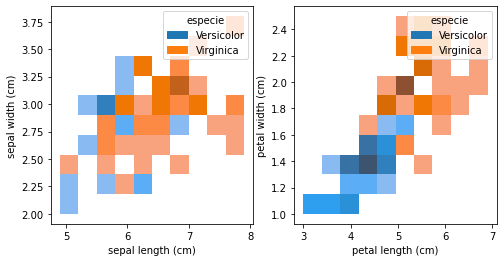

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
sns.histplot(data=df, bins=10, x='sepal length (cm)', y='sepal width (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[0])
sns.histplot(data=df, bins=10, x='petal length (cm)', y='petal width (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[1])
plt.show()

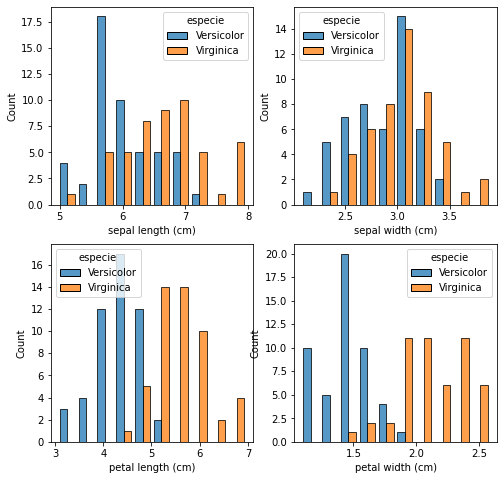

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
sns.histplot(data=df, bins=10, x='sepal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[0][0])
sns.histplot(data=df, bins=10, x='sepal width (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[0][1])
sns.histplot(data=df, bins=10, x='petal length (cm)',  hue='especie', multiple='dodge', shrink=0.8, ax=axes[1][0])
sns.histplot(data=df, bins=10, x='petal width (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[1][1])
plt.show()

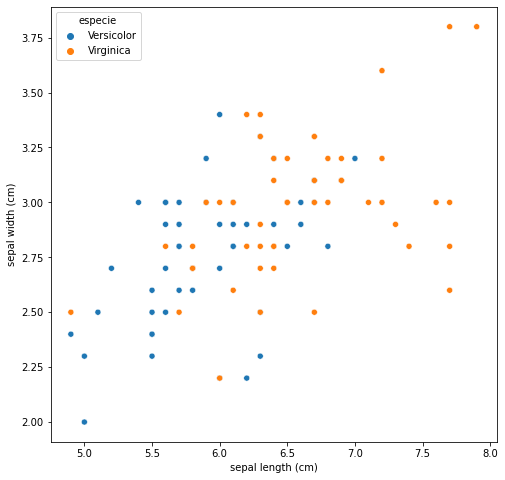

In [16]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='especie')
plt.show()

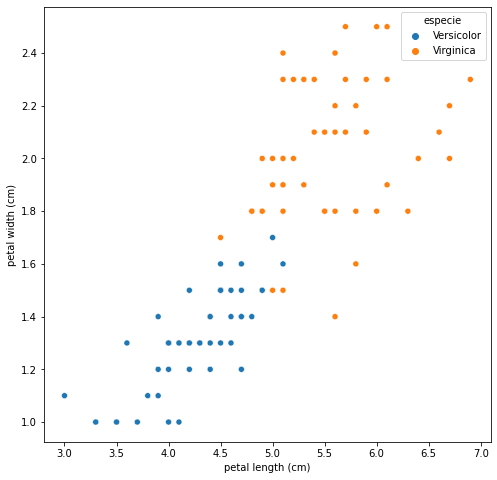

In [17]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='especie')
plt.show()

Se visualizarmos a contagem dos dados nos histogramas e analisarmos os scatterplots, ainda podemos supor que utilizar as pétalas aumenta a quantidade de acertos do nosso algoritmo, mas será que devemos ignorar o tamanho das sépalas?

Já que temos a largura e comprimento das pétalas e sépalas, podemos realizar um breve cálculo de área em todos os dados, apenas para simplificar os dados que temos aqui e reduzir os tipos de dados em duas categorias, área da pétala e área da sépala.

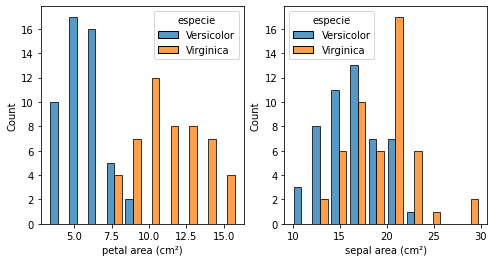

In [27]:
df['petal area (cm²)'] = np.multiply(df['petal length (cm)'], df['petal width (cm)'])
df['sepal area (cm²)'] = np.multiply(df['sepal length (cm)'], df['sepal width (cm)'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
sns.histplot(data=df, bins=10, x='petal area (cm²)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[0])
sns.histplot(data=df, bins=10, x='sepal area (cm²)',  hue='especie', multiple='dodge', shrink=0.8, ax=axes[1])
plt.show()



Podemos perceber que a área da pétala é uma ótima característica para podemos classificar os indivíduos, porém há uma breve taxa de flores Versicolor que se assemelham muito com as Virginica. Será que podemos reduzir essa semelhança entre os indivíduos cruzando os dados das pétalas e sépalas?

<center><img src="img/xeroque.jpg" width="300" height="300"/></center>

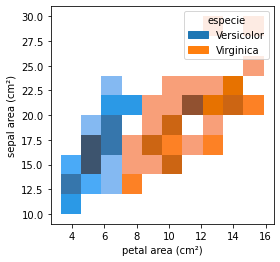

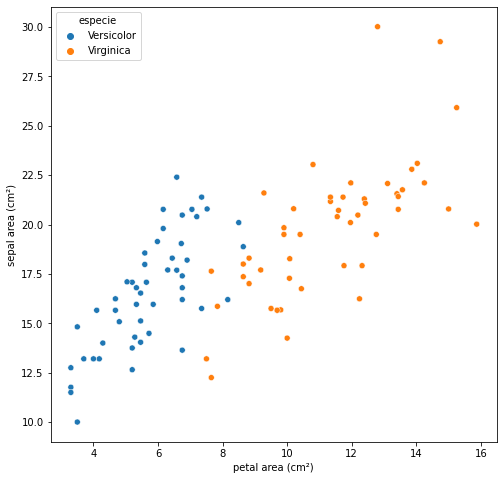

In [19]:
fig, axes = plt.subplots(nrows=1, figsize=(4,4))
sns.histplot(data=df, bins=10, x='petal area (cm²)', y='sepal area (cm²)', hue='especie', multiple='dodge', shrink=0.8)
plt.show()

plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='petal area (cm²)', y='sepal area (cm²)', hue='especie')
plt.show()

<center><img src="img/katiau.png" width="400"/></center>

Como podemos ver a quantidade de outliers entre as espécies diminuiu se compararmos as áreas das pétalas pelas áreas das sépalas. Talvez podemos traçar um limiar e distinguirmos as espécies.

## Classificador Limiar

Definimos uma função que classifica o indíviduo em uma das espécies considerando um valor limiar de área da pétala.

In [20]:
def classificador_limiar(limiar, dados, rotulos=('Versicolor', 'Virginica')):
    resposta = []   
    for idx, dado in dados.iterrows():
        if dado[0] <= limiar:
            resposta.append(rotulos[0])
        else:
            resposta.append(rotulos[1])
    return pd.DataFrame(resposta, columns=['especie'])

Ao verificarmos os valores de área das pétalas, podemos perceber que há uma variação entre 3 e 17 cm², então vamos analisar limiares entre 2 e 18, para explorar os casos de erros.

Melhor limiar: 7.495, Melhor Acurácia: 0.960


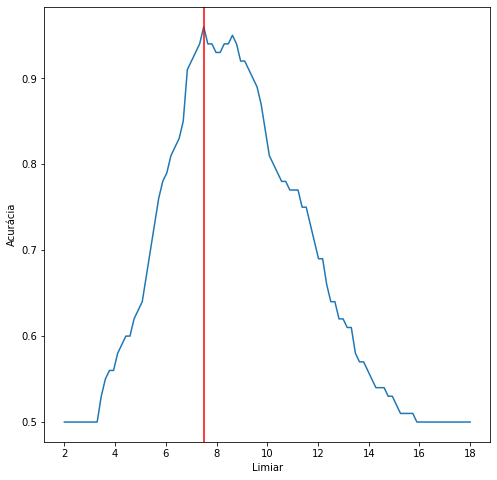

In [38]:
n_limiares = 100
limiares = np.linspace(2, 18, n_limiares)
acuracias = []

melhor_limiar = limiares[0]
melhor_acuracia = 0

dados = df[[ 'petal area (cm²)', 'sepal area (cm²)' ]]
melhor_pred = []

for limiar in limiares:
    predicoes = classificador_limiar(limiar, dados)
    
    acuracia = accuracy_score(df['especie'], predicoes['especie'])
    acuracias.append(acuracia)
    
    if acuracia > melhor_acuracia:
        melhor_acuracia = acuracia
        melhor_limiar = limiar
        melhor_pred = predicoes

print("Melhor limiar: %.3f, Melhor Acurácia: %.3f" % (melhor_limiar, melhor_acuracia))

fig, axes = plt.subplots(figsize=(8,8))
axes.plot(limiares, acuracias)
axes.axvline(melhor_limiar, color='red')
axes.set_xlabel('Limiar')
axes.set_ylabel('Acurácia')
plt.show()

# Caso queira ver os resultados, descomente as linhas abaixo
# for i in np.vstack([df['especie'].values, melhor_pred['especie'].values]).T:
#     print(i)

Temos um bom resultado com o classificador linear, 96% é uma boa taxa de acerto. Porém esse código é muito generalista e ainda não é uma inteligência artificial, queremos realmente diferenciar as espécies por mais que os indivíduos sejam muito semelhantes e queremos saber distinguir qualquer novo indivíduo que seja inserido em nossos dados posteriormente.

<center><img src="img/objetivo.jpg" width="300"/></center>

Vamos definir uma função de busca exaustiva do nosso classificador linear, assim armazenando os melhores limiares e acurácias entre os nossos casos de teste

In [29]:
def busca_exaustiva_classificador_limiar(n_limiares, atributos, rotulos, area_min, area_max):

    limiares = np.linspace(area_min, area_max, n_limiares)

    melhor_limiar = accuracy_score(rotulos, classificador_limiar(limiares[0], atributos))
    melhor_acuracia = 0

    for limiar in limiares[1:]:
        predicoes = classificador_limiar(limiar, atributos)

        acuracia = accuracy_score(rotulos, predicoes['especie'])

        if acuracia > melhor_acuracia:
            melhor_acuracia = acuracia
            melhor_limiar = limiar
            
    return melhor_limiar, melhor_acuracia



Vamos então definir casos de teste e treino para podermos ensinar a máquina tomar decisões por conta própria, dividindo os dados em 20% para o treino.

[9063 1398 7095 1843 3759 5736 2864 7766 5984 2537 1621 5425  641 2703
 5561 7303 1452 8584 8260  925]


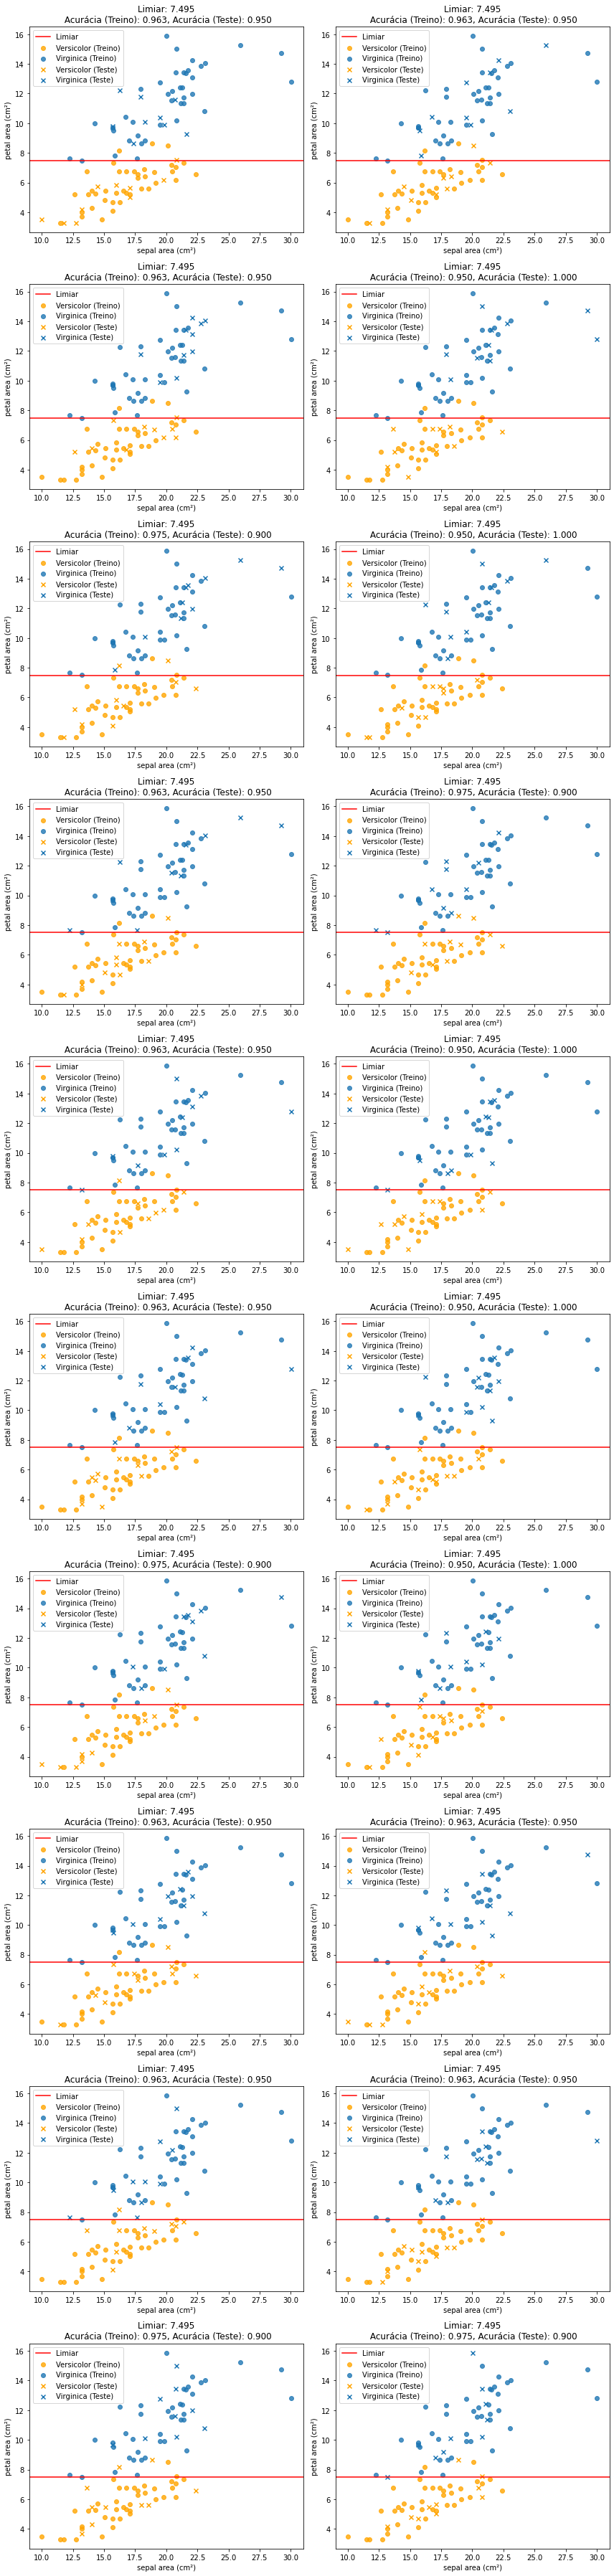

In [36]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(12,50))
rns = np.random.randint(9999,size=20)   #sementes de números aleatórios para usar no train_test_split

print(rns)

accs = []

for row in range(10):
    for col in range(2):
        
        x_treino, x_teste, y_treino, y_teste = train_test_split(df[['petal area (cm²)', 'sepal area (cm²)']], df['especie'], 
                                                        test_size=0.2, stratify=df['especie'].tolist(),
                                                        shuffle=True, random_state=rns[row * 2 + col])
        
        melhor_limiar, melhor_acuracia = busca_exaustiva_classificador_limiar(100, x_treino, y_treino, 2, 18)
        
        axes[row][col].scatter(x = x_treino.loc[y_treino[y_treino=='Versicolor'].index].values[:,1], 
                           y = x_treino.loc[y_treino[y_treino=='Versicolor'].index].values[:,0],
                           label='Versicolor (Treino)', c='orange', alpha=0.8)

        axes[row][col].scatter(x = x_treino.loc[y_treino[y_treino=='Virginica'].index].values[:,1], 
                           y = x_treino.loc[y_treino[y_treino=='Virginica'].index].values[:,0],
                           label='Virginica (Treino)', c='#1f77b4', alpha=0.8)

        axes[row][col].scatter(x = x_teste.loc[y_teste[y_teste=='Versicolor'].index].values[:,1], 
                           y = x_teste.loc[y_teste[y_teste=='Versicolor'].index].values[:,0],
                           label='Versicolor (Teste)', marker='x', c='orange')

        axes[row][col].scatter(x = x_teste.loc[y_teste[y_teste=='Virginica'].index].values[:,1], 
                           y = x_teste.loc[y_teste[y_teste=='Virginica'].index].values[:,0],
                           label='Virginica (Teste)', marker='x', c='#1f77b4')

        axes[row][col].axhline(melhor_limiar, color='red', label='Limiar')
        
        axes[row][col].legend()
        axes[row][col].set_ylabel('petal area (cm²)')
        axes[row][col].set_xlabel('sepal area (cm²)')
        
        predicoes = classificador_limiar(melhor_limiar, x_teste)
        acc = accuracy_score(y_teste, predicoes)
        
        
        predicoes_treino = classificador_limiar(melhor_limiar, x_treino)
        acc_treino = accuracy_score(y_treino, predicoes_treino)
        accs.append(acc_treino)
        axes[row][col].set_title('Limiar: %.3f\n Acurácia (Treino): %.3f, Acurácia (Teste): %.3f' % (melhor_limiar, acc_treino, acc))
        
fig.tight_layout()



In [37]:
print("Acurácias: %.3f (min), %.3f (max), %.3f+-%.3f (media+=desvio)" % (min(accs), max(accs), np.mean(accs), np.std(accs)))

Acurácias: 0.950 (min), 0.975 (max), 0.963+-0.009 (media+=desvio)


Está pronto o nosso classificador binário por limiar, com precisão máxima de 97%, perceba que ele também possui uma acurácia média alta e um desvio padrão baixo. Podemos considerar esse algoritmo um sucesso!


<center><img src="img/yes.gif" width="500"/></center>